In [1]:
import string
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
%matplotlib inline

from pandas_datareader import data as wb

In [2]:
# collecting stock data from Alpha Vantage platform for AAPL, MSFT, GOOGL, IBM, and AMZN from start_date (2015)

# we use Alpha Vantage over Quantl since data is no longer supported by their community since 2018-03. 
# in order to use Alpha Vantage data, you will need to request your own API key, and replace the field below.
# keys can be acquired for free here: https://www.alphavantage.co/support/#api-key

# alternatively, you can simply pull from other resources like Yahoo Finance with the Pandas' Datareader.

key = '################' # placeholder for private API key. Replace key's value with your own
start_date = '2015-01-01' # start date for our timeseries data

### Comment out following block of code when using your own key ###
with open('Alpha_Vantage_API_Key.txt','r') as f:
    key = f.read()
f.close()
### End block ###

# pulls raw data and saves as a CSV
def stock_timeseries_dataframe(symbol, key):
    directory = "Sharpe_Portfolio_Allocation/" + symbol + "_Data"
    stock_ts = TimeSeries(key=key, output_format='pandas')
    data, metadata = stock_ts.get_daily_adjusted(symbol=symbol,outputsize='full')
    data.to_csv(directory)
    return pd.read_csv(directory, index_col='date', parse_dates=True)

# cleans time series data frames from Alpha Vantage
def clean_stock_dataframes(stock):
    stock.columns = stock.columns.str.lstrip(string.digits).str.replace(".",'', regex=True).str.strip().str.title() # fixing cols
    stock = stock[::-1] # reversing order so last entry is present date
    stock = stock.loc[start_date:] # starts record at start date until present. Comment if want data for all time
    return stock

# creating stock time series data frames from Alpha Vantage data
aapl = stock_timeseries_dataframe('AAPL', key)
msft = stock_timeseries_dataframe('MSFT', key)
googl = stock_timeseries_dataframe('GOOGL', key)
ibm = stock_timeseries_dataframe('IBM', key)
amzn = stock_timeseries_dataframe('AMZN', key)

# cleaning data frames to match our desired format
aapl = clean_stock_dataframes(aapl)
msft = clean_stock_dataframes(msft)
googl = clean_stock_dataframes(googl)
ibm = clean_stock_dataframes(ibm)
amzn = clean_stock_dataframes(amzn)

companies = [aapl, msft, googl, ibm, amzn]

In [3]:
# quick check of imported stocks
aapl.head()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient
date,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,24.779987,53204626.0,0.0,1.0
2015-01-05,108.29,108.65,105.410,106.25,24.081896,64285491.0,0.0,1.0
2015-01-06,106.54,107.43,104.630,106.26,24.084162,65797116.0,0.0,1.0
2015-01-07,107.20,108.20,106.695,107.75,24.421875,40105934.0,0.0,1.0
2015-01-08,109.23,112.15,108.700,111.89,25.360219,59364547.0,0.0,1.0


In [4]:
# calculating cumulative (normalized) daily returns
for df_stock in (aapl, msft, googl, ibm, amzn):
    df_stock['Normalized Return'] = df_stock['Adjusted Close']/df_stock.iloc[0]['Adjusted Close']
aapl.head()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Normalized Return
date,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,24.779987,53204626.0,0.0,1.0,1.000000
2015-01-05,108.29,108.65,105.410,106.25,24.081896,64285491.0,0.0,1.0,0.971828
2015-01-06,106.54,107.43,104.630,106.26,24.084162,65797116.0,0.0,1.0,0.971920
2015-01-07,107.20,108.20,106.695,107.75,24.421875,40105934.0,0.0,1.0,0.985548
2015-01-08,109.23,112.15,108.700,111.89,25.360219,59364547.0,0.0,1.0,1.023415


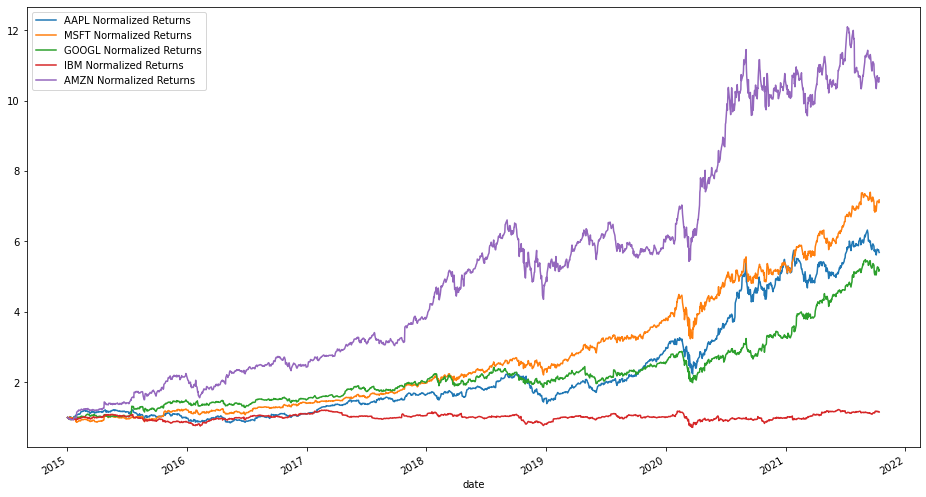

In [5]:
# plotting our normalized returns
aapl['Normalized Return'].plot(label='AAPL Normalized Returns')
msft['Normalized Return'].plot(label='MSFT Normalized Returns')
googl['Normalized Return'].plot(label='GOOGL Normalized Returns')
ibm['Normalized Return'].plot(label='IBM Normalized Returns')
amzn['Normalized Return'].plot(label='AMZN Normalized Returns', figsize = (16,9))
plt.legend()

In [6]:
# appending 'allocation' column that assumes we have 25% in AAPL, 25% in MSFT, 20% in GOOGL, 10% in IBM, 20% in AMZN
for stock,allocation in zip([aapl,msft,googl,ibm,amzn],[.25,.25,.2,.1,.2]):
    stock['Allocation'] = stock['Normalized Return']*allocation
aapl.head()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Normalized Return,Allocation
date,,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,24.779987,53204626.0,0.0,1.0,1.000000,0.250000
2015-01-05,108.29,108.65,105.410,106.25,24.081896,64285491.0,0.0,1.0,0.971828,0.242957
2015-01-06,106.54,107.43,104.630,106.26,24.084162,65797116.0,0.0,1.0,0.971920,0.242980
2015-01-07,107.20,108.20,106.695,107.75,24.421875,40105934.0,0.0,1.0,0.985548,0.246387
2015-01-08,109.23,112.15,108.700,111.89,25.360219,59364547.0,0.0,1.0,1.023415,0.255854


In [7]:
# we then assume we've allocated $100K into this portfolio
for stock in [aapl,msft,googl,ibm,amzn]:
    stock['Position Values'] = stock['Allocation']*100000
aapl.head()

,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Normalized Return,Allocation,Position Values
date,,,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,24.779987,53204626.0,0.0,1.0,1.000000,0.250000,25000.000000
2015-01-05,108.29,108.65,105.410,106.25,24.081896,64285491.0,0.0,1.0,0.971828,0.242957,24295.710235
2015-01-06,106.54,107.43,104.630,106.26,24.084162,65797116.0,0.0,1.0,0.971920,0.242980,24297.996890
2015-01-07,107.20,108.20,106.695,107.75,24.421875,40105934.0,0.0,1.0,0.985548,0.246387,24638.708497
2015-01-08,109.23,112.15,108.700,111.89,25.360219,59364547.0,0.0,1.0,1.023415,0.255854,25585.383701


In [8]:
# combine these positions into a single dataframe aggregating all our positions, and calculate total value
portfolio_val = pd.concat([aapl['Position Values'], msft['Position Values'], googl['Position Values'], 
                           ibm['Position Values'], amzn['Position Values']], axis = 1)
portfolio_val.columns = ['AAPL Pos','MSFT Pos', 'GOOGL Pos', 'IBM Pos', 'AMZN Pos']
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,MSFT Pos,GOOGL Pos,IBM Pos,AMZN Pos,Total Pos
date,,,,,,
2015-01-02,25000.000000,25000.000000,20000.000000,10000.000000,20000.000000,100000.000000
2015-01-05,24295.710235,24767.429427,19618.921726,9842.650870,19589.653831,98114.366089
2015-01-06,24297.996890,24406.544055,19134.737041,9630.383808,19142.357060,96612.018854
2015-01-07,24638.708497,24716.638152,19078.462846,9567.444156,19345.261247,97346.514899
2015-01-08,25585.383701,25443.755346,19144.934378,9775.391830,19477.505510,99426.970766


Text(0.5, 1.0, 'Total Portfolio Value 2015-Present')

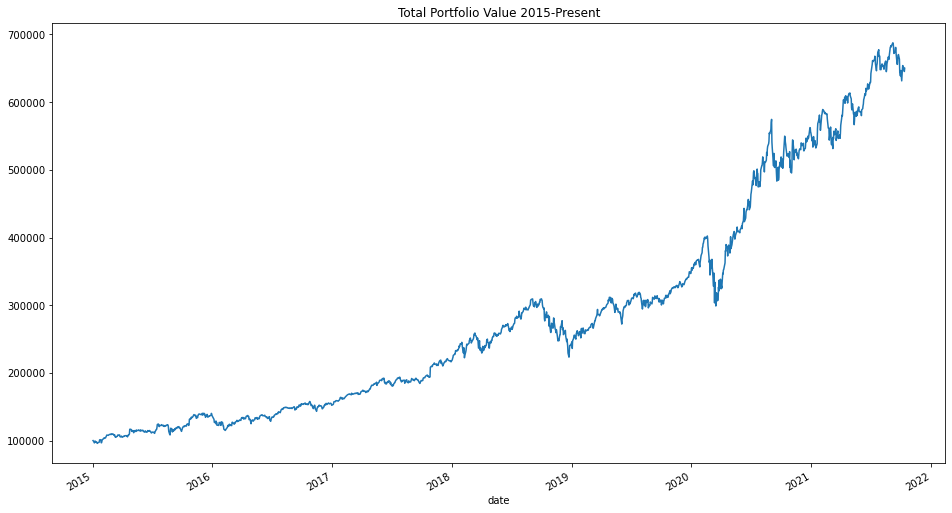

In [9]:
# plot this value over time
portfolio_val['Total Pos'].plot(figsize=(16,9))
plt.title("Total Portfolio Value 2015-Present")

Text(0.5, 1.0, 'Position Values 2015-Present')

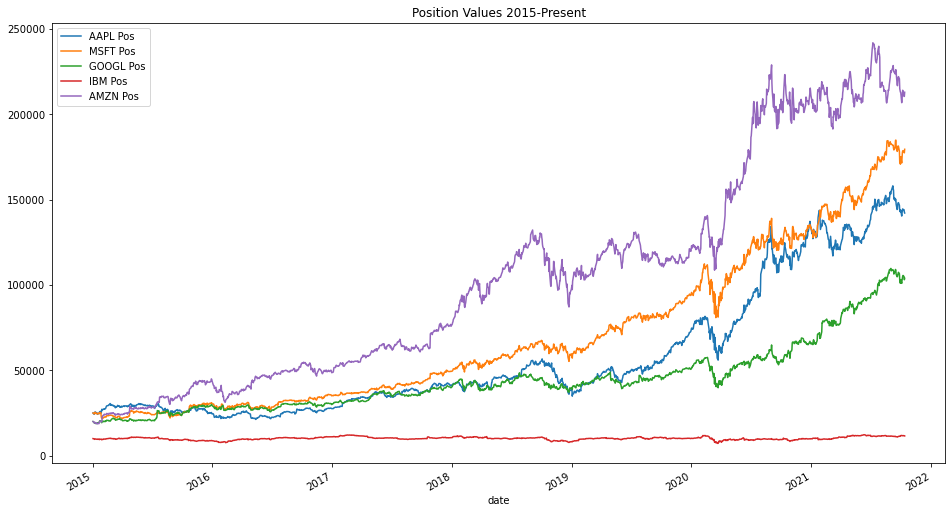

In [10]:
# plotting the changes in each portfolio investment over time
portfolio_val.drop('Total Pos', axis=1).plot(kind='line', figsize=(16,9))
plt.title("Position Values 2015-Present")

In [11]:
### Markowitz portfolio optimization
# now use Monte Carlo Simulation to determine maximized (best) Sharpe Ratio and optimize weights of portfolio

# collect WB & FB stock data
WMT = wb.DataReader('WMT', data_source='yahoo', start='2018-1-3')
FB = wb.DataReader('FB', data_source='yahoo', start='2018-1-3')
df = pd.concat([WMT['Adj Close'], FB['Adj Close']], axis = 1)
df = df.set_axis(['WMT', 'FB'], axis=1, inplace=False)
df.head()

,WMT,FB
Date,,
2018-01-03,92.557693,184.669998
2018-01-04,92.641472,184.330002
2018-01-05,93.190559,186.850006
2018-01-08,94.568008,188.279999
2018-01-09,93.432564,187.869995


<AxesSubplot:xlabel='Date'>

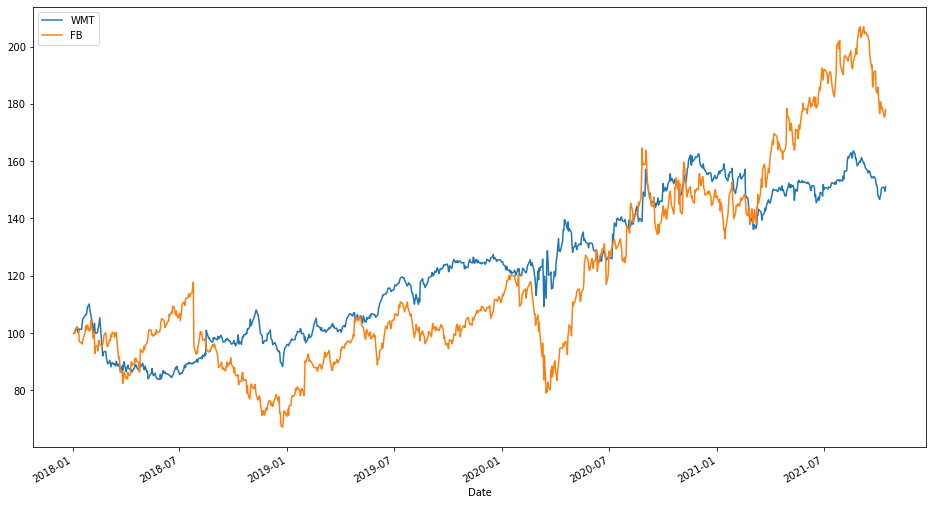

In [12]:
#plotting normalized values to number 100
(df/df.iloc[0]*100).plot(figsize=(16,9))

In [13]:
# calculating logarithmic returns
log_returns = np.log(df/df.shift(1))
log_returns.head()

,WMT,FB
Date,,
2018-01-03,NaN,NaN
2018-01-04,0.000905,-0.001843
2018-01-05,0.005910,0.013579
2018-01-08,0.014673,0.007624
2018-01-09,-0.012079,-0.002180


In [14]:
# calculate mean, covariance, and correlation matrices of WMT and FB
mean = log_returns.mean() * 250 # ~250 trading days in year
cov = log_returns.cov() * 250
corr = log_returns.corr()

In [15]:
print("Mean: ")
mean

Mean: 


WMT    0.108352
FB     0.151531
dtype: float64

In [16]:
print("Cov: ")
cov # low covariance

Cov: 


,WMT,FB
WMT,0.051585,0.023026
FB,0.023026,0.132952


In [17]:
print("Corr: ")
corr # average correlation

Corr: 


,WMT,FB
WMT,1.000000,0.278044
FB,0.278044,1.000000


In [18]:
companies = [WMT, FB] # for training, companies defined otherwise early in code

# determining number of assets from our portfolio in generalized manner
num_assets = len(companies)

In [19]:
# creating randomized weights for our assets in our portfolio
weights = np.random.random(num_assets)
weights /= np.sum(weights) # ensures weights cannot exceed total of 100%
weights

array([0.46604689, 0.53395311])

In [20]:
# expected portfolio return
np.sum(weights * mean) # sum of weighted average log returns

0.13140757643643827

In [21]:
# expected portfolio variance
np.dot(weights.T, np.dot(cov, weights)) # dot product of (weight transpose, dot of (covariance of log returns & weights))

0.060569740071600334

In [22]:
# expected portfolio volatility
np.sqrt(np.dot(weights.T, np.dot(cov, weights))) # square root of expected portfolio variance

0.24610920354915689

In [23]:
# simulate 1000 different weight value combinations for our assets
portfolio_returns=[] # empty list to store returns
portfolio_volatilities=[] # empty list to store volatilities
for x in range(1000):
    # creating randomized weights for our assets in our portfolio
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # ensures weights cannot exceed total of 100%
    portfolio_returns.append(np.sum(weights * mean)) # sum of weighted average log returns
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(cov, weights)))) # square root of expected portfolio variance


portfolio_returns,portfolio_volatilities

([0.13602135769493184,
  0.13493198204636295,
  0.12818497816924784,
  0.1406132559155241,
  0.13951403368277973,
  0.1209146294655824,
  0.11467915629511334,
  0.13535393276685814,
  0.10941274419792235,
  0.13627132292786465,
  0.10877622706112945,
  0.1368188296257966,
  0.11312799637248827,
  0.12582125349474846,
  0.1282373607447762,
  0.13986480553520117,
  0.11139043267396585,
  0.10922890062761678,
  0.13060419146185956,
  0.13361136008042498,
  0.12312761891171083,
  0.136159000997431,
  0.1215721217559465,
  0.12924878610674015,
  0.1321450374226605,
  0.12492612903965633,
  0.13290071660869202,
  0.12940043944011123,
  0.12964510996870382,
  0.1266485644155469,
  0.13062495029827345,
  0.12541271448515318,
  0.1325353461945984,
  0.15146772757965082,
  0.12661661061841106,
  0.1282085630268937,
  0.11570079662026231,
  0.11969706706259538,
  0.1296389052422373,
  0.13478156018572773,
  0.1375556638059831,
  0.1166334114882316,
  0.11811511929575462,
  0.1502902964637948,
  0

In [24]:
# converting lists into arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)
portfolio_returns,portfolio_volatilities

(array([0.13602136, 0.13493198, 0.12818498, 0.14061326, 0.13951403,
        0.12091463, 0.11467916, 0.13535393, 0.10941274, 0.13627132,
        0.10877623, 0.13681883, 0.113128  , 0.12582125, 0.12823736,
        0.13986481, 0.11139043, 0.1092289 , 0.13060419, 0.13361136,
        0.12312762, 0.136159  , 0.12157212, 0.12924879, 0.13214504,
        0.12492613, 0.13290072, 0.12940044, 0.12964511, 0.12664856,
        0.13062495, 0.12541271, 0.13253535, 0.15146773, 0.12661661,
        0.12820856, 0.1157008 , 0.11969707, 0.12963891, 0.13478156,
        0.13755566, 0.11663341, 0.11811512, 0.1502903 , 0.12858725,
        0.13765803, 0.12552733, 0.13412523, 0.11309726, 0.13821134,
        0.11913479, 0.11085141, 0.11931347, 0.12588859, 0.13708743,
        0.12772819, 0.14611032, 0.1279144 , 0.13441181, 0.13787281,
        0.13965371, 0.13682667, 0.11973015, 0.11239274, 0.1164594 ,
        0.12936395, 0.12184604, 0.12528915, 0.13288171, 0.12839788,
        0.13514024, 0.14842405, 0.12736609, 0.12

In [25]:
# combining these two arrays into a dataframe
portfolios = pd.DataFrame({'Return':portfolio_returns,'Volatility':portfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.136021,0.268048
1,0.134932,0.262491
2,0.128185,0.233595
3,0.140613,0.293626
4,0.139514,0.287214


In [26]:
portfolios.tail()

,Return,Volatility
995,0.129646,0.238950
996,0.131469,0.246374
997,0.108501,0.226693
998,0.138720,0.282692
999,0.121189,0.216436


Text(0, 0.5, 'Expected Return')

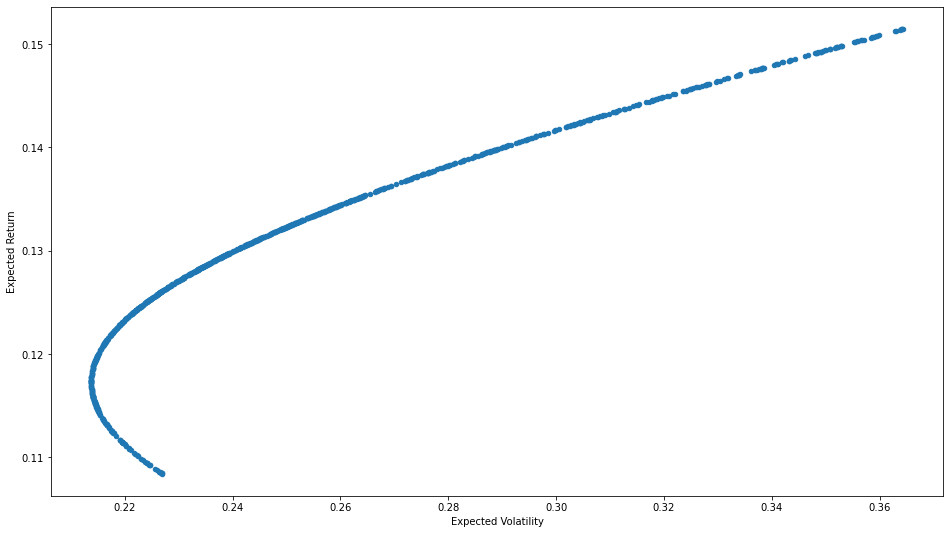

In [27]:
# plotting returns vs volatility to generate a graph of the efficiency frontier
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(16,9))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')